In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from pathlib import Path
from keras.preprocessing import image

Using TensorFlow backend.


In [2]:
p_test = Path("./alzheimers_dataset/test")

dirsr = p_test.glob("*")

test_image_data = []
test_label_data = []
sum_test = 0
for folder_path in dirsr :
    label = (str(folder_path)).split("\\")[-1]
    
    cnt = 0
    print("Processing ",label)
    
    for img_path in folder_path.glob("*.jpg"):
        img = image.load_img(img_path,target_size=(150,150))
        img_array = image.img_to_array(img)
        
        test_image_data.append(img_array)
        test_label_data.append(label)
        
        cnt += 1
        
    print("Number of images: ",cnt)
    sum_test +=cnt
    
print("Total Number of images: ",sum_test)

Processing  MildDemented
Number of images:  143
Processing  NonDemented
Number of images:  512
Processing  VeryMildDemented
Number of images:  358
Total Number of images:  1013


In [3]:
label_dict = {}

cnt = 0
for labels in np.unique(test_label_data):
    label_dict[labels] = cnt
    cnt +=1
    
label_dict.items()

dict_items([('MildDemented', 0), ('NonDemented', 1), ('VeryMildDemented', 2)])

In [4]:
reverse_dict = dict((value,key) for (key,value) in label_dict.items())
reverse_dict.items()

dict_items([(0, 'MildDemented'), (1, 'NonDemented'), (2, 'VeryMildDemented')])

In [5]:
import pickle

In [7]:
with open("reverse_dict.pkl",'wb') as f:
    pickle.dump(reverse_dict,f)

In [8]:
for i in range(len(test_label_data)):
    test_label_data[i] = label_dict[test_label_data[i]]

## Shuffle Data

In [9]:
import random

In [10]:
test_combined = list(zip(test_image_data,test_label_data))
random.shuffle(test_combined)
test_image_data[:],test_label_data[:] = zip(*test_combined)

In [11]:
print(test_label_data[:5])

[1, 1, 0, 1, 1]


In [12]:
Xtest = np.array(test_image_data)/255.0
Ytest = np.array(test_label_data).astype('float32')

print(Xtest.shape)
print(Ytest.shape)

(1013, 150, 150, 3)
(1013,)


In [13]:
def drawImg(img,label):
    plt.style.use("seaborn")
    plt.title(reverse_dict[label])
    plt.axis("off")
    plt.imshow(img)
    plt.show()

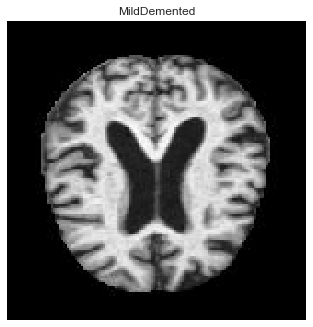

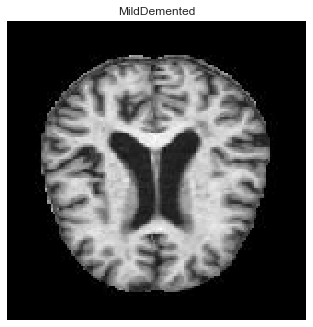

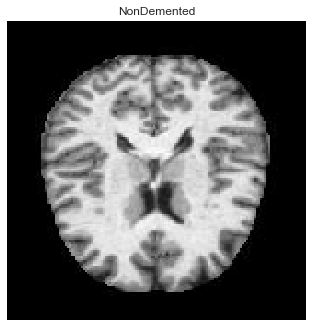

In [14]:
for i in range(3):
    r = np.random.randint(len(Xtest))
    drawImg(Xtest[r],Ytest[r])

In [15]:
model = load_model("alzheimers_model.hdf5")

In [16]:
outputs = model.predict(Xtest)

In [17]:
print(outputs.shape)

(1013, 3)


In [18]:
result = np.zeros((outputs.shape[0]))
for i in range(outputs.shape[0]):
    result[i] = np.argmax(outputs[i])

In [19]:
print(result.shape)
print(result[:10])

(1013,)
[1. 1. 0. 1. 1. 1. 1. 2. 1. 0.]


In [20]:
from sklearn.metrics import classification_report,confusion_matrix
from visualize import plot_confusion_matrix

In [21]:
print(classification_report(result,Ytest))

              precision    recall  f1-score   support

         0.0       0.55      0.76      0.64       104
         1.0       0.80      0.77      0.78       536
         2.0       0.73      0.71      0.72       373

    accuracy                           0.74      1013
   macro avg       0.70      0.74      0.71      1013
weighted avg       0.75      0.74      0.75      1013



In [22]:
cnf_matrix = confusion_matrix(result,Ytest)
print(cnf_matrix)

[[ 79  14  11]
 [ 41 411  84]
 [ 23  87 263]]


Confusion matrix, without normalization
[[ 79  14  11]
 [ 41 411  84]
 [ 23  87 263]]


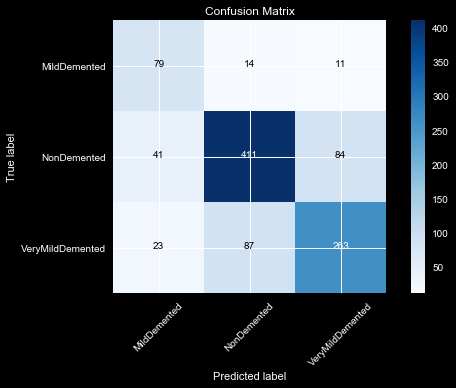

In [23]:
plt.style.use('dark_background')
plot_confusion_matrix(cnf_matrix,classes = ["MildDemented","NonDemented","VeryMildDemented"],title="Confusion Matrix")